# Основы построения графиков

Для построения графиков в Python разработано целое множество инструментов (библиотек):
[matplotlib][mpl], [plotly][plotly], [seaborn][seaborn] и др.

Каждый из указанных инструментов разработан для решения определённых задач.
Например, библиотека [matplotlib][mpl], разработанная в конце XX века в NASA, является универсальным инструментом построения графиков в окнах операционной системы:
с её помощью можно строить самые разнообразные двухмерные и [трёхмерные графики][mpl3d]
и даже создавать [анимированные визуализации][mpl_animation].

Остальные библиотеки визуализации данных вдохновлены [matplotlib][mpl] и упрощают создание сложных и красивых графиков.
Так, с помощью [plotly][plotly] строят графики, с которыми можно взаимодействовать в браузере, так как данная библиотека основана на JavaScript.
Такой подход значительно упрощает и совершенствует обмен результатами обработки данных между различными учёными, инженерами и их группами.
Инструмент [seaborn][seaborn] заточен под визуализацию статистических данных, поэтому нашёл широкое применение в науке о данных, машинном обучении и т.п.

```{note}
Всю необходимую информацию по наиболее распространённым способам визуализации данных
вы можете найти в книге ["Python для сложных задач"][python4hard].
```

```{note}
Исчерпывающим источником информации по различным python-библиотекам
является их документация.
```

В данном разделе мы рассмотрим основы создания графика только одним инструментом - [matplotlib][mpl].
Освоив его, вы с лёгкостью научитесь пользоваться любым другим пакетом визуализации данных в Python.

В качестве функции рассмотрим кубическую параболу:

$$
f(x) = x^3,
$$

которую изобразим в пределах $x \in [-2, 2]$.

[mpl]: https://matplotlib.org/
[plotly]: https://plotly.com/python/
[seaborn]: https://seaborn.pydata.org/
[mpl3d]: https://matplotlib.org/stable/gallery/mplot3d/index.html
[mpl_animation]: https://matplotlib.org/stable/gallery/animation/index.html
[python4hard]: https://www.ozon.ru/product/python-dlya-slozhnyh-zadach-nauka-o-dannyh-i-mashinnoe-obuchenie-vander-plas-dzh-211433316/?sh=KZ1LwfQryQ

## Данные для визуализации

Прежде чем построить какой-либо график, что-либо визуализировать, и не важно каким конкретно инструментом это самое _что-либо_ нужно рассчитать или загрузить из базы данных. Мы будем рассчитывать. Опишем нашу функцию $f(x)$:

In [14]:
def f_cubic(x):
    return x**3

Теперь инициализируем [numpy](https://numpy.org/)-массив `x` из 101 значения в указанных выше пределах $x \in [-2, 2]$:

In [15]:
import numpy as np

# Разобьём интервал на 100 отрезков
x = np.linspace(-2, 2, 101)

Вызываем `f_cubic(...)` и получаем массив `y`:

In [16]:
y = f_cubic(x)

Всё готово для построения графика.

## matplotlib

Для начала импортируем соответствующий инструмент - модуль [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
Это принято делать так:

In [17]:
import matplotlib.pyplot as plt

В пакете [pyplot][pyplot] реализованы классы и функции построения графиков в Matlab-стиле.

[pyplot][pyplot] построен в парадигме объектно-ориентированного программирования, т.е. графики (их оси, метки, линии и т.д.) являются объектами, хранящими в себе всю необходимую информацию. При этом существуют два подхода к визуализации с помощью [pyplot][pyplot]:

* стиль Matlab и
* объектно-ориентированный стиль.

### Стиль MATLAB

График строится без явного создания объектов модуля [pyplot][pyplot].

[pyplot]: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

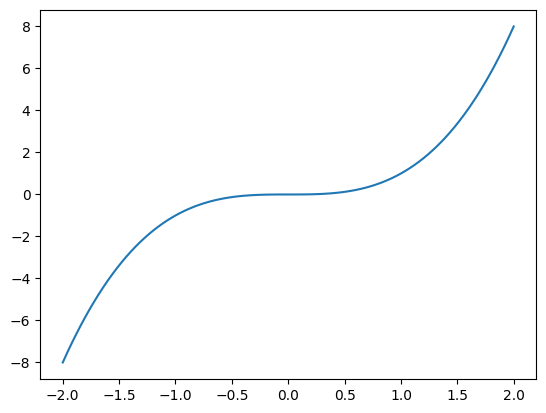

In [18]:
plt.plot(x, y);
# Оператор ";" в данном случае нужен для того,
# чтобы не выводилась техническая информация о созданном окне.
# При запуске кода из консоли эта информация не будет выводиться,
# в таком случае оператор ";" ни на что не влияет.

Только и всего!

### Объектно-ориентированный стиль

В этом случае мы явно создаём фигуру (рисунок) типа `plt.figure` и ось типа `plt.axis`. Сделать это можно несколькими способами.
Например, так:

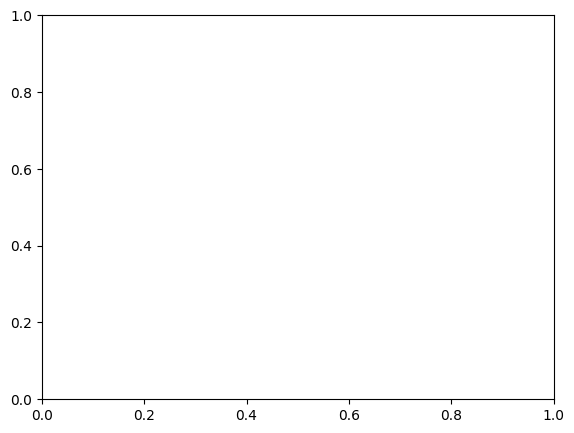

In [19]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8])
# Список, переданный add_axes(...) в качестве аргумента,
# описывает прямоугольник "рабочего поля" (оси plt.axis) -
# то, что очерчено чёрными осями.
# Первые два значения - координата левой нижней точки прямоугольника
# в относительных (от 0 до 1) координатах окна;
# вторые два значения - ширина и высота этого прямоугольника
# в тех же координатах.

Или с помощью функции `plt.subplots`, которая возвращает кортеж вида
`(plt.figure, plt.axes)`:

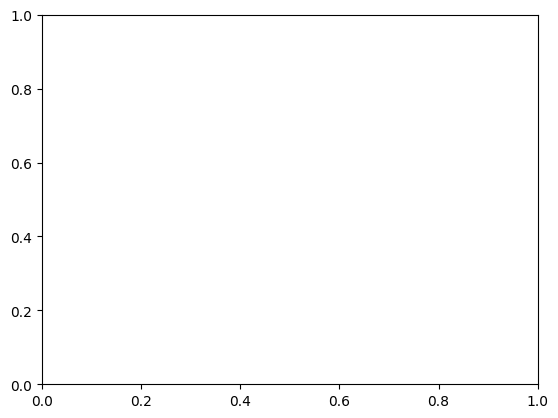

In [20]:
fig, ax = plt.subplots()
# Кортеж сразу распакован

```{attention}
axis - это ось, ед. число; axes - оси во множ. числе.

В общем случае `plt.subplots` возвращает массив осей, но по умолчанию ось всего одна, поэтому возвращённый экземпляр в данном случае имеет тип `plt.axis` вместо `plt.axes`.
```

Теперь у нас есть два объекта с именами `fig` (фигура, рисунок, окно типа `plt.figure`) и `ax` (ось типа `plt.axis`).
В терминах [matplotlib](https://matplotlib.org/) `fig` - это окно, т.е. весь рисунок выше; `ax` - это область, ограниченная числовыми осями графика.

Отрисовка происходит непосредственно через объект оси `ax`:

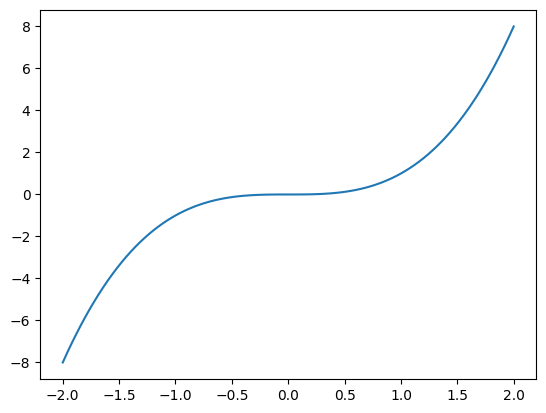

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y);

```{note}
Может возникнуть вопрос. Зачем создавать объекты явно (2 или 3 строки кода) вместо того, чтобы использовать неявный метод (1 строка кода)?
Дело в том, что явным методом возможно строить очень сложные графики, в т.ч. трёхмерные. Неявный метод для этого не подходит.
```

Вот таким образом строятся плоские графики с помощью [matplotlib](https://matplotlib.org/).